<a href="https://colab.research.google.com/github/charujhagrawat20/StackIt/blob/main/Prac5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

In [ ]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFuncton', 'Age', 'Outcome']

In [ ]:
df_pima = pd.read_csv(url)

In [ ]:
df_pima = pd.read_csv(url, names=columns)

In [ ]:
df_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFuncton,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_uci = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_uci['target'] = diabetes.target
print(df_uci.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [ ]:
df_pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFuncton,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_pima.mean(numeric_only=True)

,0
Pregnancies,3.845052
Glucose,120.894531
BloodPressure,69.105469
SkinThickness,20.536458
Insulin,79.799479
BMI,31.992578
DiabetesPedigreeFuncton,0.471876
Age,33.240885
Outcome,0.348958


In [ ]:
df_pima.median(numeric_only=True)

,0
Pregnancies,3.0000
Glucose,117.0000
BloodPressure,72.0000
SkinThickness,23.0000
Insulin,30.5000
BMI,32.0000
DiabetesPedigreeFuncton,0.3725
Age,29.0000
Outcome,0.0000


In [ ]:
df_pima.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFuncton,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [ ]:
df_pima.std(numeric_only=True)


,0
Pregnancies,3.369578
Glucose,31.972618
BloodPressure,19.355807
SkinThickness,15.952218
Insulin,115.244002
BMI,7.884160
DiabetesPedigreeFuncton,0.331329
Age,11.760232
Outcome,0.476951


In [ ]:
df_pima.var(numeric_only=True)

,0
Pregnancies,11.354056
Glucose,1022.248314
BloodPressure,374.647271
SkinThickness,254.473245
Insulin,13281.180078
BMI,62.159984
DiabetesPedigreeFuncton,0.109779
Age,138.303046
Outcome,0.227483


In [ ]:
for col in df_pima.columns[:-1]:

    print(df_pima[col].value_counts())


Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64
Glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64
SkinThickness
0     227
32     31
30     27
27     23
23     22
18     20
33     20
28     20
31     19
39     18
19     18
2

In [ ]:
df_pima.skew(numeric_only=True)


,0
Pregnancies,0.901674
Glucose,0.173754
BloodPressure,-1.843608
SkinThickness,0.109372
Insulin,2.272251
BMI,-0.428982
DiabetesPedigreeFuncton,1.919911
Age,1.129597
Outcome,0.635017


In [ ]:
df_pima.kurtosis(numeric_only=True)

,0
Pregnancies,0.159220
Glucose,0.640780
BloodPressure,5.180157
SkinThickness,-0.520072
Insulin,7.214260
BMI,3.290443
DiabetesPedigreeFuncton,5.594954
Age,0.643159
Outcome,-1.600930


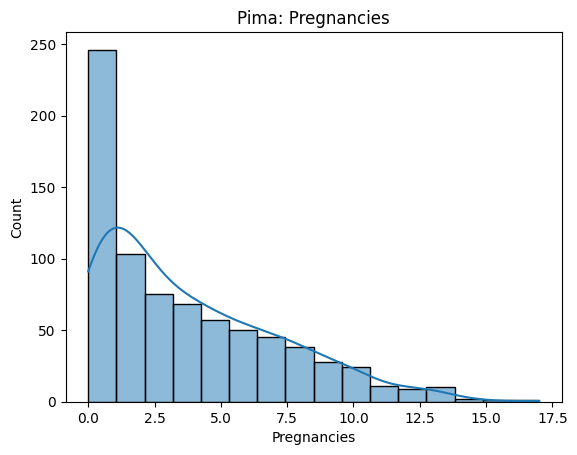

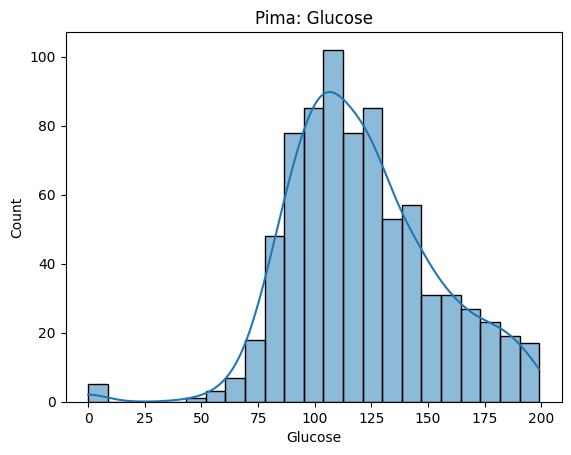

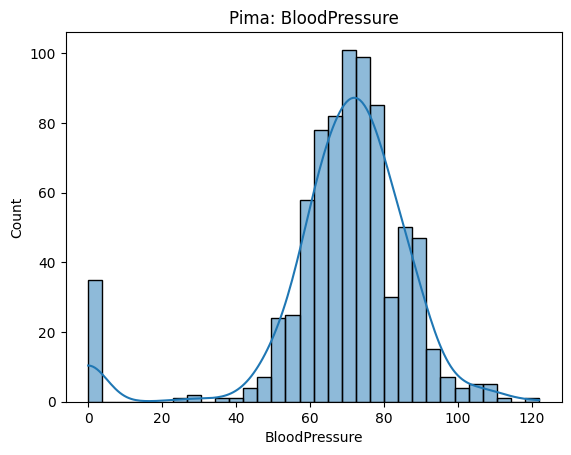

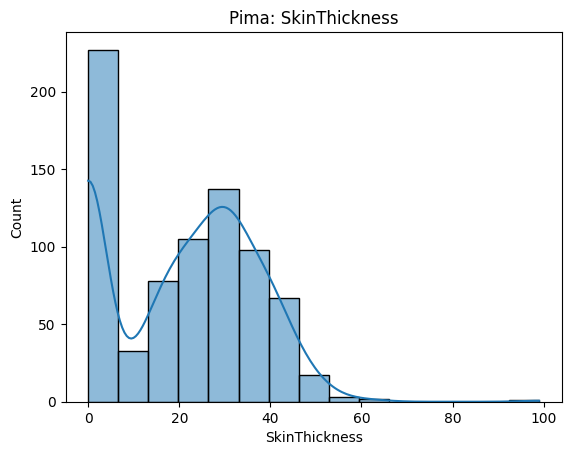

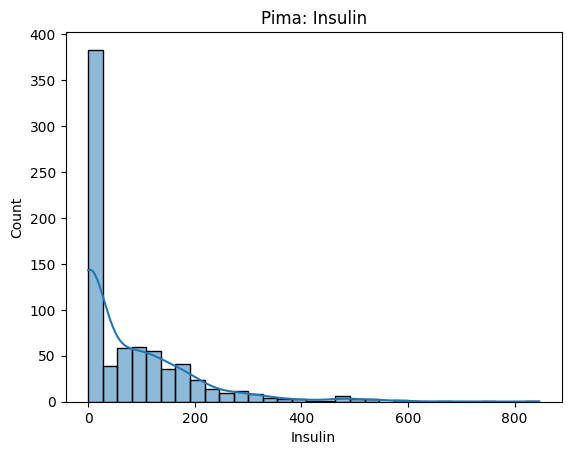

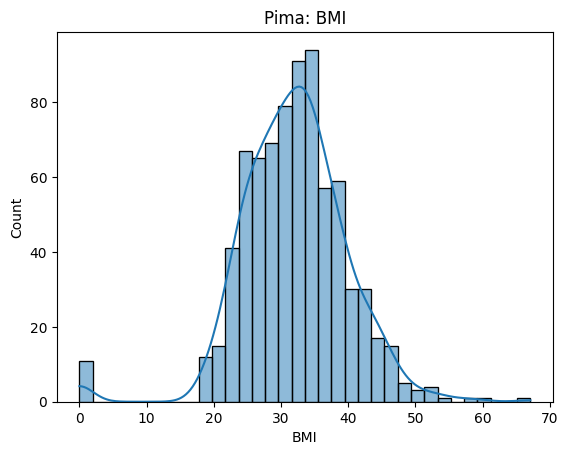

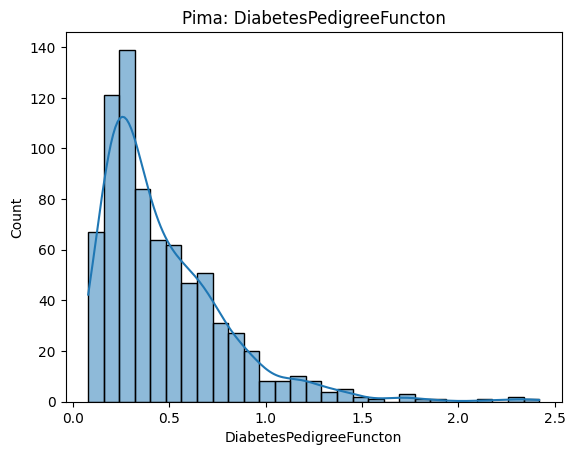

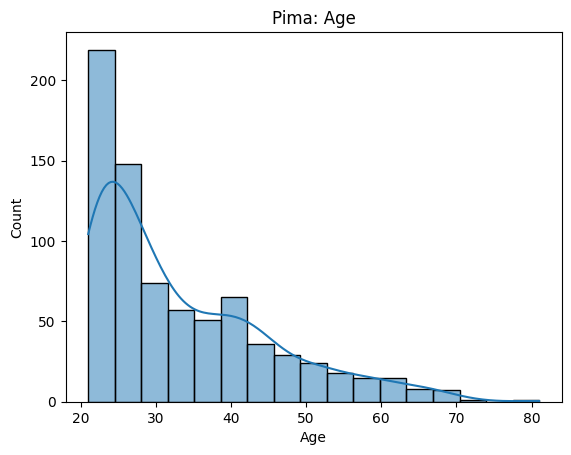

In [ ]:

# Example for Pima
for col in df_pima.columns[:-1]: # exclude Outcome
  sns.histplot(df_pima[col], kde=True)
  plt.title(f'Pima: {col}')
  plt.show()


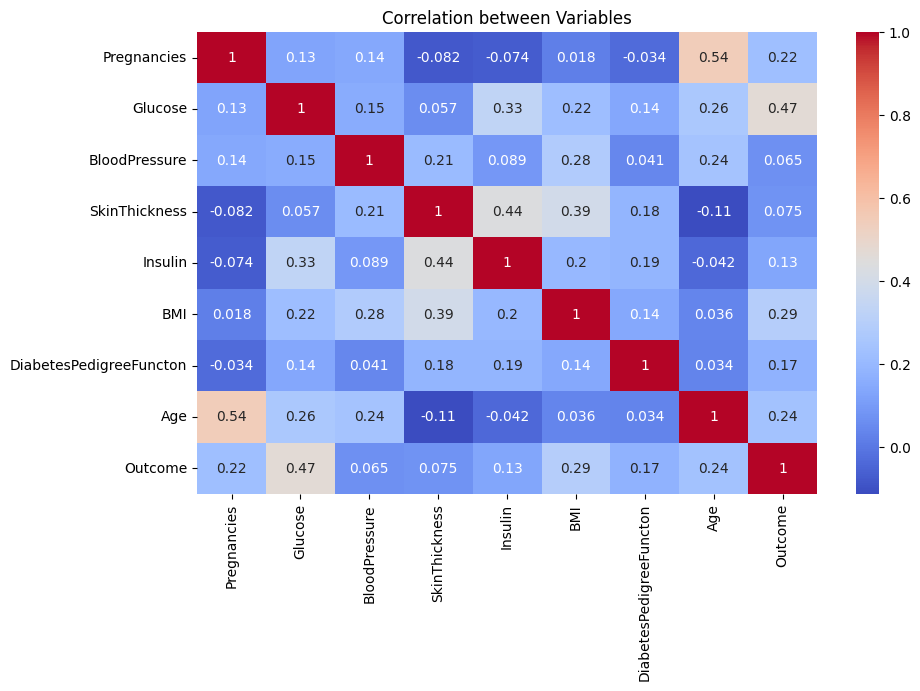

In [ ]:
# Correlation heatmap - numeric Vs numeric
plt.figure(figsize=(10,6))
sns.heatmap(df_pima.corr(), annot=True,
cmap='coolwarm')
plt.title("Correlation between Variables")
plt.show()


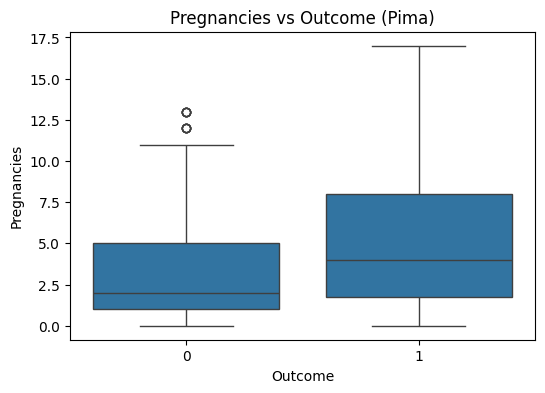

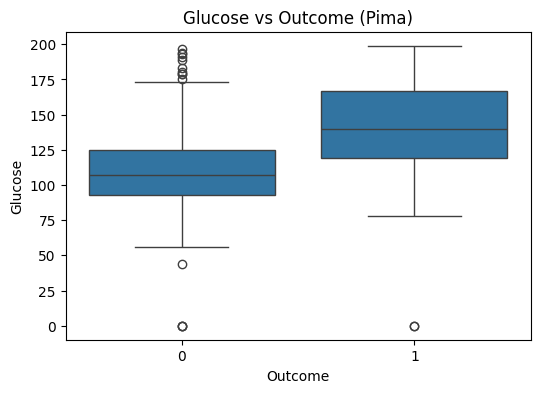

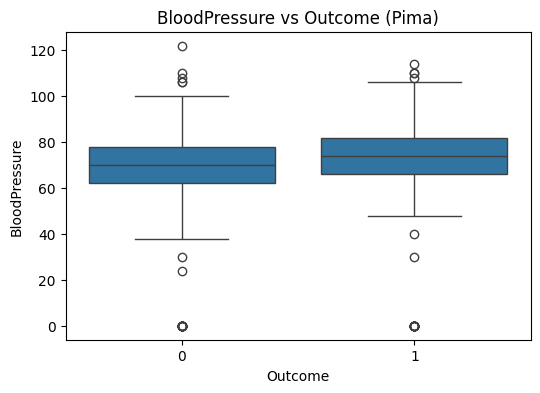

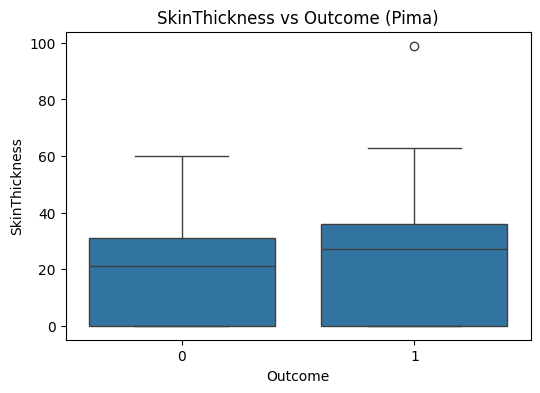

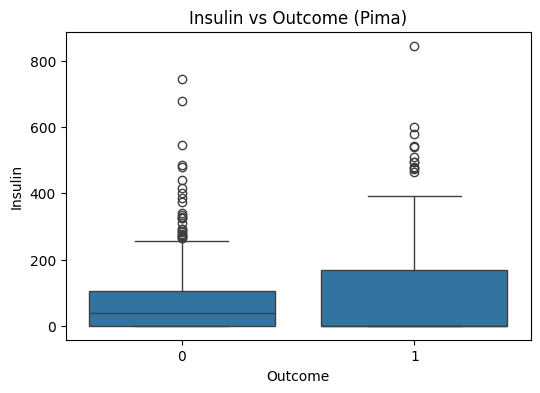

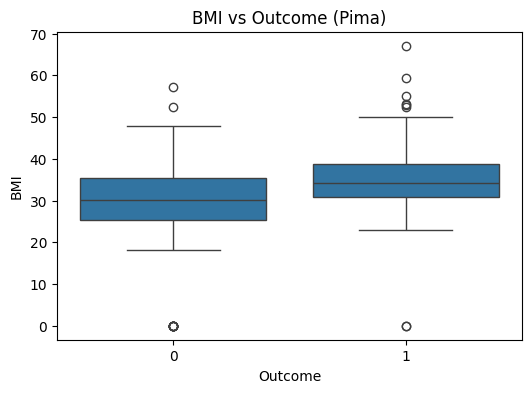

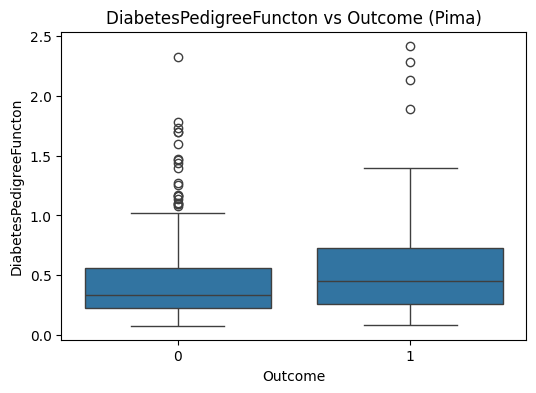

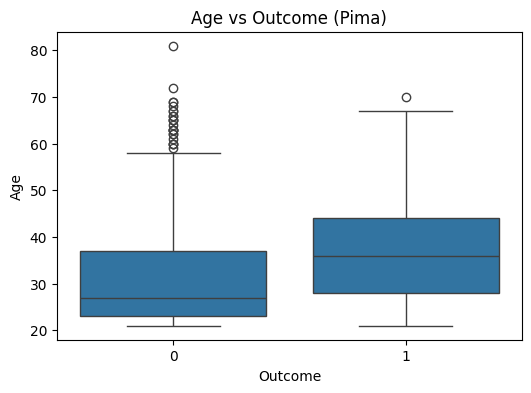

In [ ]:
# Loop through all columns except 'Outcome'
for col in df_pima.columns[:-1]:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x='Outcome', y=col, data=df_pima)
  plt.title(f'{col} vs Outcome (Pima)')
  plt.show()

In [ ]:
X = df_pima[['Glucose']]
y = df_pima['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

print("Coefficient:", lin_model.coef_[0])
print("Intercept:", lin_model.intercept_)
print("R² score:", r2_score(y_test, y_pred))


Coefficient: 0.0067826344151996065
Intercept: -0.47281007618874077
R² score: 0.25463232826956206


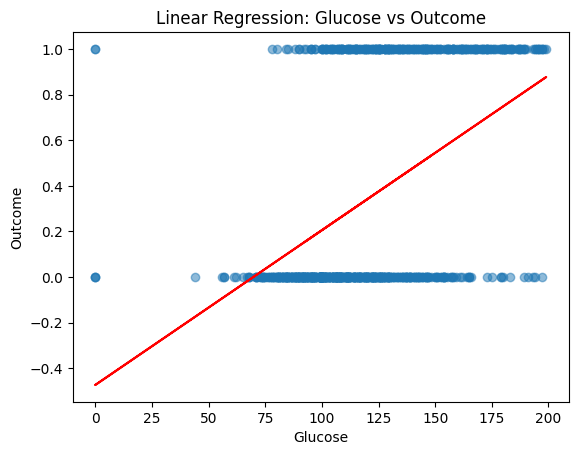

In [ ]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, lin_model.predict(X), color='red')
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.title("Linear Regression: Glucose vs Outcome")
plt.show()


In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print("Coefficient:", log_model.coef_[0][0])
print("Accuracy:", accuracy_score(y_test, y_pred))


Coefficient: 0.0373942397693677
Accuracy: 0.7532467532467533


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


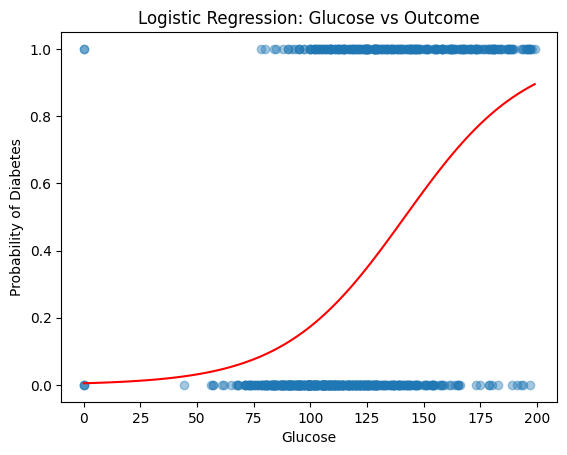

In [ ]:
import numpy as np
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_prob = log_model.predict_proba(X_range)[:, 1]

plt.scatter(X, y, alpha=0.4)
plt.plot(X_range, y_prob, color='red')
plt.xlabel("Glucose")
plt.ylabel("Probability of Diabetes")
plt.title("Logistic Regression: Glucose vs Outcome")
plt.show()

In [ ]:
features = ['Glucose', 'BMI', 'Age', 'Pregnancies']
X = df_pima[features]
y = df_pima['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
multi_lin_model = LinearRegression()
multi_lin_model.fit(X_train, y_train)

y_pred = multi_lin_model.predict(X_test)

coefficients = pd.DataFrame(multi_lin_model.coef_, index=features, columns=['Coefficient'])
print(coefficients)
print("R² score:", r2_score(y_test, y_pred))


             Coefficient
Glucose         0.005356
BMI             0.014147
Age             0.005917
Pregnancies     0.010201
R² score: 0.22965227960124013


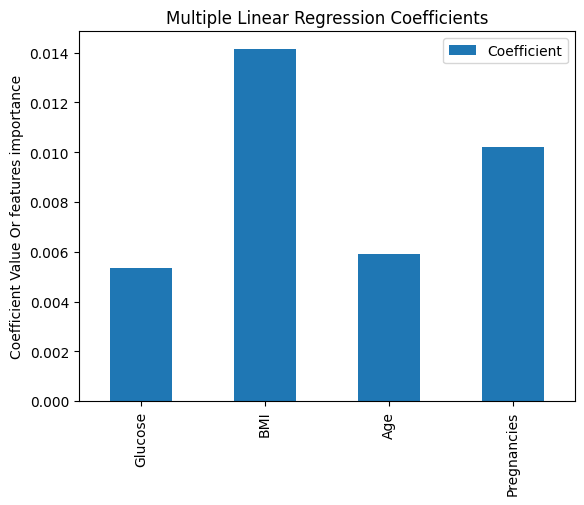

In [ ]:
coefficients.plot(kind='bar')
plt.title("Multiple Linear Regression Coefficients")
plt.ylabel("Coefficient Value Or features importance")
plt.show()


In [ ]:
multi_log_model = LogisticRegression(max_iter=1000)
multi_log_model.fit(X_train, y_train)

y_pred = multi_log_model.predict(X_test)

coefficients = pd.DataFrame(multi_log_model.coef_[0], index=features, columns=['Coefficient'])
print(coefficients)
print("Accuracy:", accuracy_score(y_test, y_pred))

             Coefficient
Glucose         0.031098
BMI             0.094806
Age             0.034228
Pregnancies     0.061346
Accuracy: 0.7532467532467533


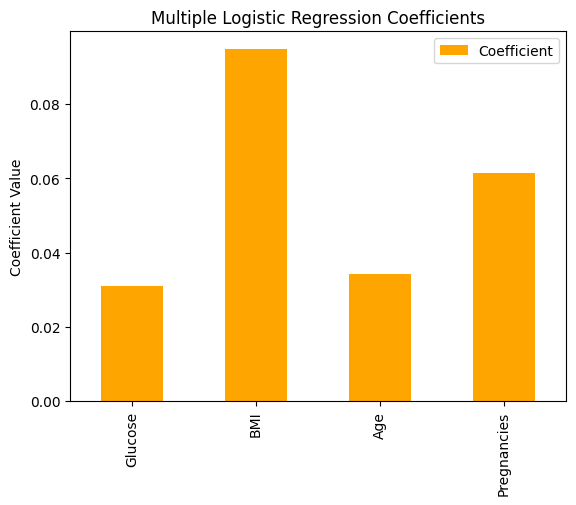

In [ ]:
coefficients.plot(kind='bar', color='orange')
plt.title("Multiple Logistic Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.show()


In [ ]:
df_uci.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [ ]:
df_uci.mean(numeric_only=True)

,0
age,-1.444295e-18
sex,2.543215e-18
bmi,-2.255925e-16
bp,-4.854086e-17
s1,-1.428596e-17
s2,3.898811e-17
s3,-6.028360e-18
s4,-1.788100e-17
s5,9.243486e-17
s6,1.351770e-17


In [ ]:
df_uci.median(numeric_only=True)

,0
age,0.005383
sex,-0.044642
bmi,-0.007284
bp,-0.005670
s1,-0.004321
s2,-0.003819
s3,-0.006584
s4,-0.002592
s5,-0.001947
s6,-0.001078


In [ ]:
df_uci.mode()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.016281,-0.044642,-0.030996,-0.040099,-0.037344,-0.001001,-0.013948,-0.039493,-0.018114,0.003064,72.0
1,NaN,NaN,-0.024529,-0.005670,-0.007073,0.016222,NaN,NaN,NaN,NaN,200.0


In [ ]:
df_uci.std(numeric_only=True)


,0
age,0.047619
sex,0.047619
bmi,0.047619
bp,0.047619
s1,0.047619
s2,0.047619
s3,0.047619
s4,0.047619
s5,0.047619
s6,0.047619


In [ ]:
df_uci.var(numeric_only=True)

,0
age,0.002268
sex,0.002268
bmi,0.002268
bp,0.002268
s1,0.002268
s2,0.002268
s3,0.002268
s4,0.002268
s5,0.002268
s6,0.002268


In [ ]:
for col in df_uci.columns[:-1]:

    print(df_uci[col].value_counts())


age
 0.016281    19
 0.041708    17
 0.009016    16
-0.027310    15
 0.045341    14
-0.052738    14
 0.012648    14
-0.001882    14
 0.005383    13
 0.067136    13
 0.030811    12
-0.005515    12
 0.023546    12
 0.001751    12
 0.048974    11
-0.009147    11
 0.019913    11
-0.041840    11
-0.023677    10
 0.038076    10
 0.027178     9
-0.045472     9
 0.034443     9
-0.074533     8
-0.049105     7
 0.070769     7
 0.059871     7
-0.060003     7
-0.020045     7
-0.016412     7
-0.056370     6
-0.034575     6
 0.074401     6
 0.063504     6
-0.038207     6
-0.070900     6
-0.085430     5
-0.030942     5
 0.081666     5
 0.056239     5
 0.052606     4
-0.063635     4
-0.096328     4
-0.092695     4
-0.078165     4
-0.012780     4
-0.103593     3
-0.067268     3
-0.089063     3
-0.107226     3
 0.096197     2
-0.099961     2
 0.110727     2
-0.081798     2
 0.085299     1
 0.092564     1
 0.078034     1
 0.088931     1
Name: count, dtype: int64
sex
-0.044642    235
 0.050680    207
Name

In [ ]:
df_uci.skew(numeric_only=True)


,0
age,-0.231382
sex,0.127385
bmi,0.598148
bp,0.290658
s1,0.378108
s2,0.436592
s3,0.799255
s4,0.735374
s5,0.291754
s6,0.207917


In [ ]:
df_uci.kurtosis(numeric_only=True)

,0
age,-0.671224
sex,-1.992811
bmi,0.095094
bp,-0.532797
s1,0.232948
s2,0.601381
s3,0.981507
s4,0.444402
s5,-0.134367
s6,0.236917


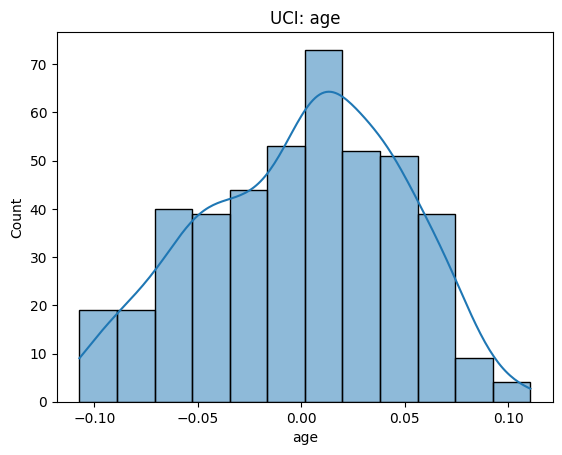

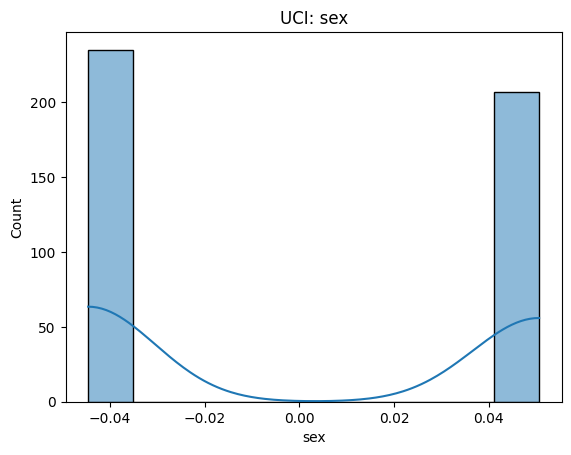

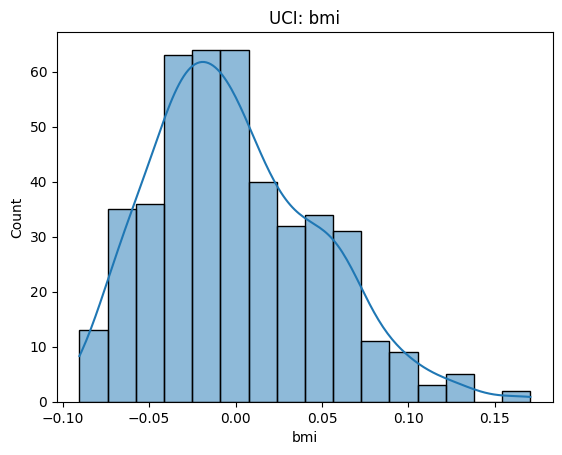

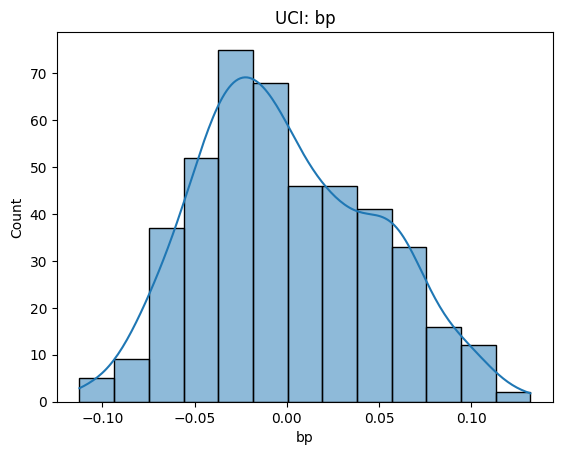

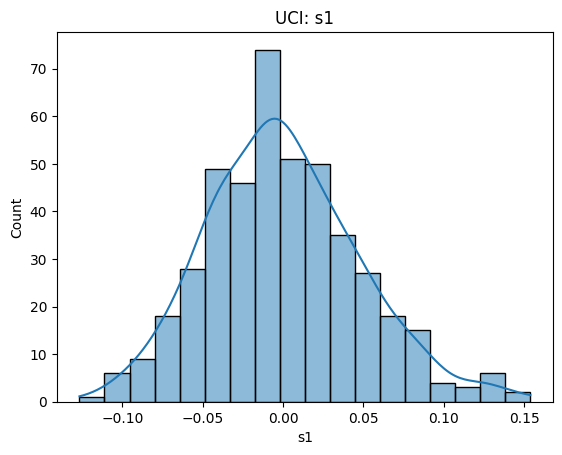

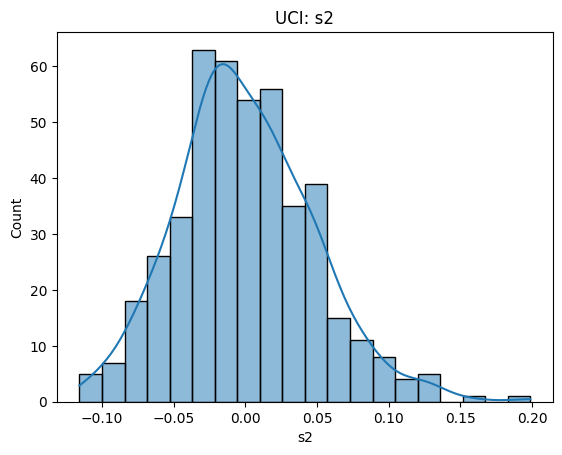

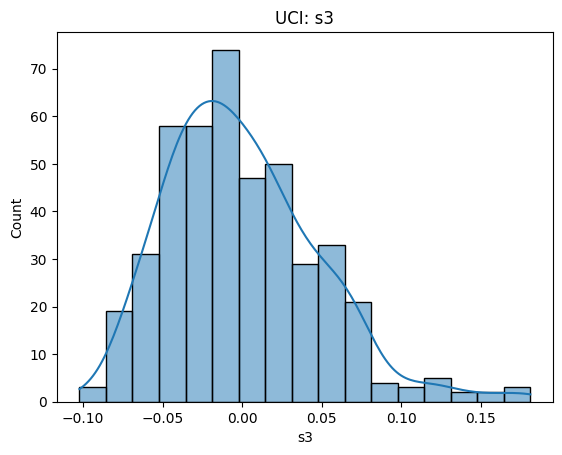

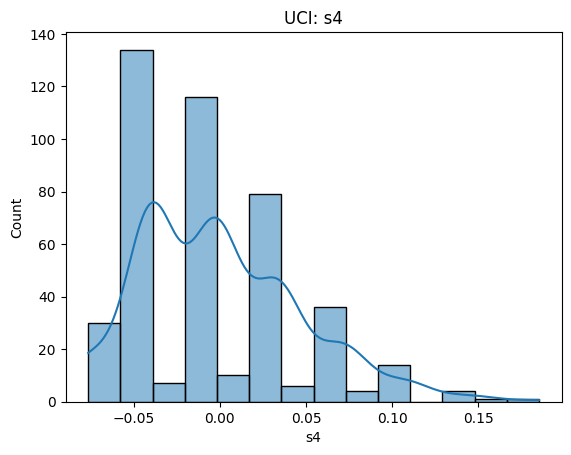

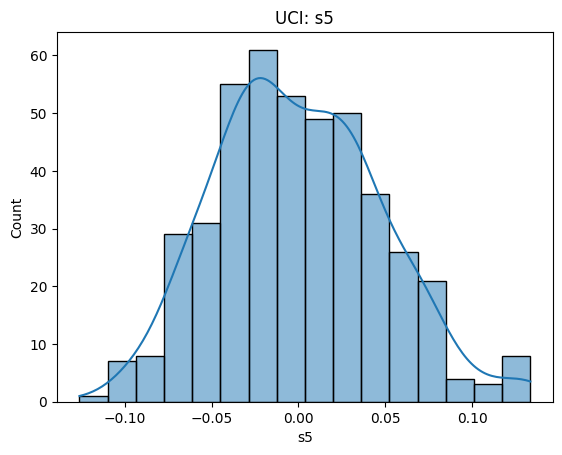

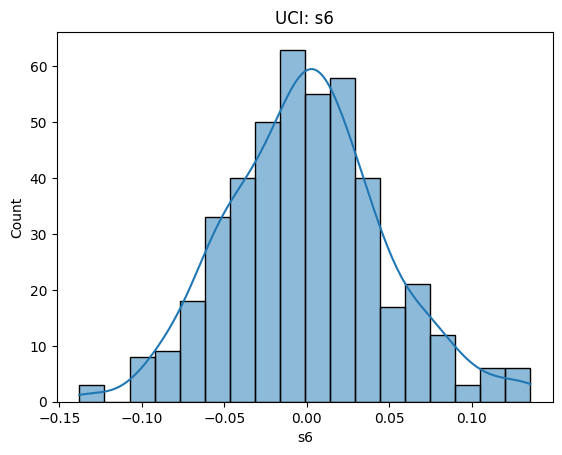

In [ ]:

# Example for Pima
for col in df_uci.columns[:-1]: # exclude Outcome
  sns.histplot(df_uci[col], kde=True)
  plt.title(f'UCI: {col}')
  plt.show()


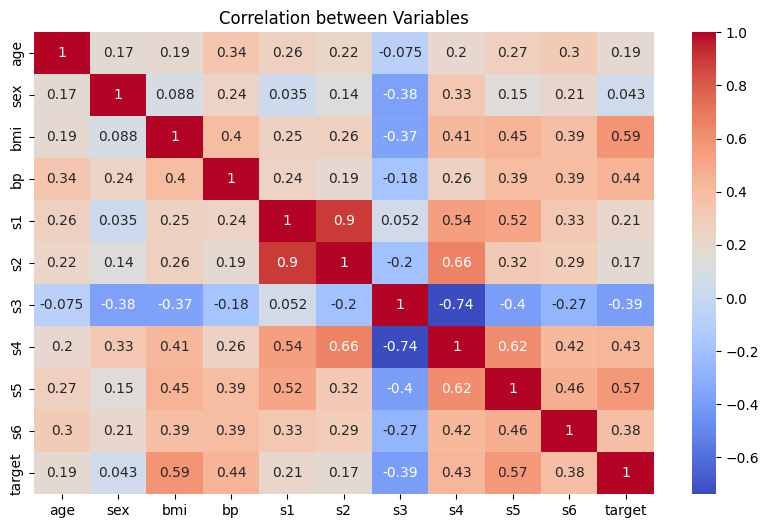

In [ ]:
# Correlation heatmap - numeric Vs numeric
plt.figure(figsize=(10,6))
sns.heatmap(df_uci.corr(), annot=True,
cmap='coolwarm')
plt.title("Correlation between Variables")
plt.show()


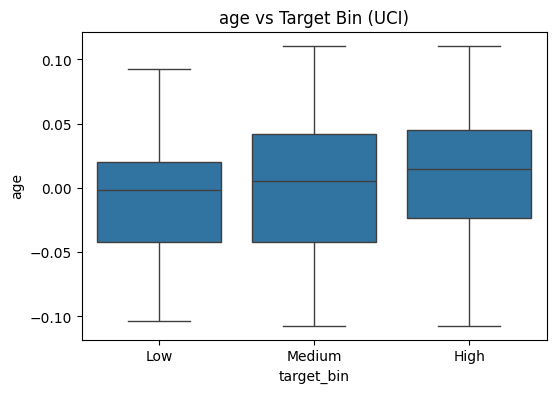

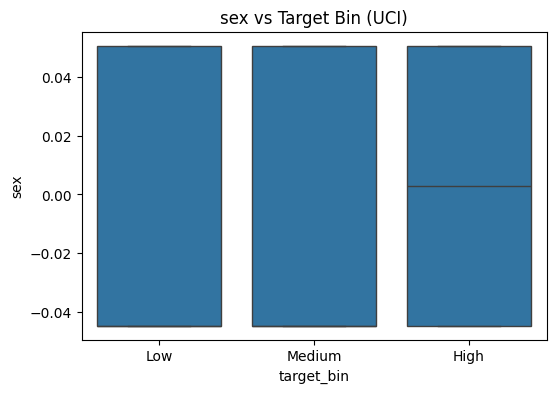

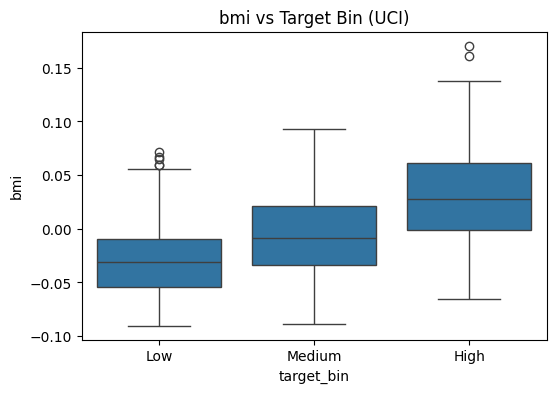

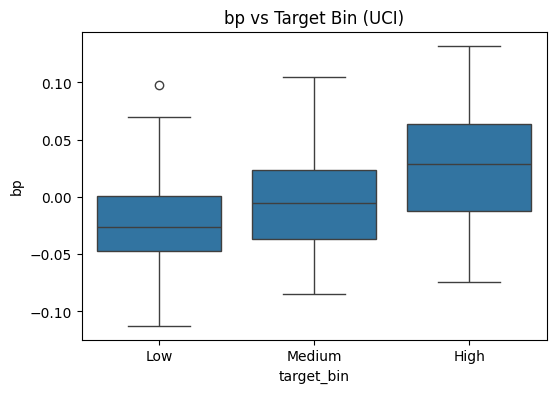

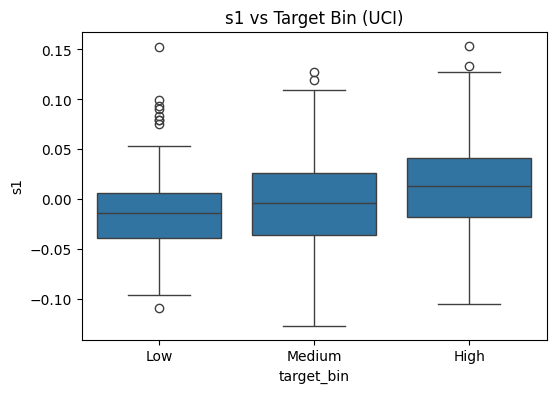

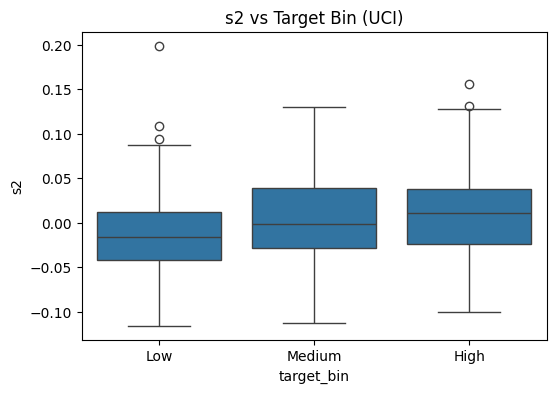

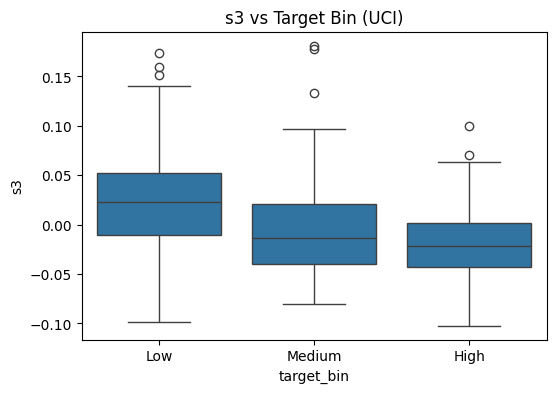

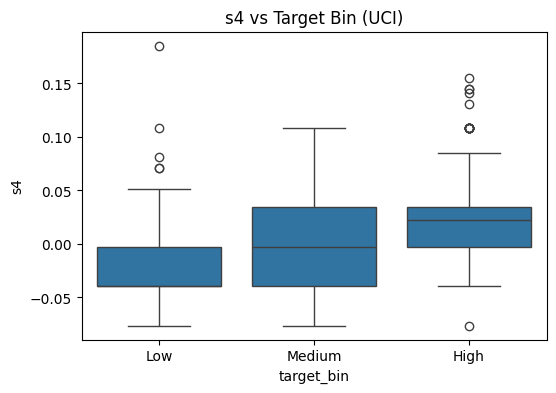

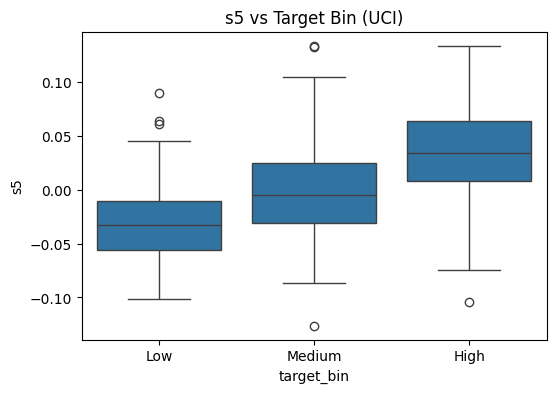

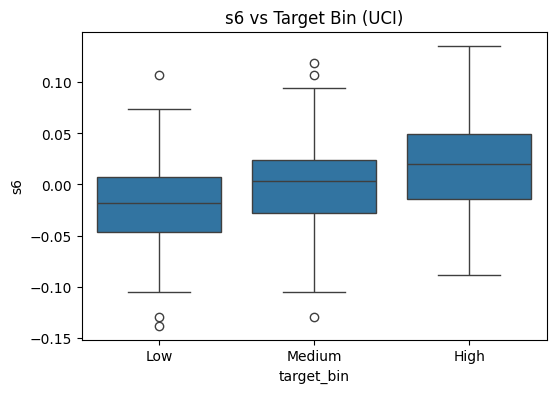

In [ ]:
#Create target bins (e.g., Low, Medium, High)
df_uci['target_bin'] = pd.qcut(df_uci['target'], q=3, labels=['Low', 'Medium', 'High'])
for col in df_uci.columns[:-2]:  # exclude 'target' and 'target_bin'
  plt.figure(figsize=(6, 4))
  sns.boxplot(x='target_bin', y=col, data=df_uci)
  plt.title(f'{col} vs Target Bin (UCI)')
  plt.show()


In [ ]:


X_bmi = df_uci[['bmi']]
y = df_uci['target']

X_train, X_test, y_train, y_test = train_test_split(
    X_bmi, y, test_size=0.2, random_state=42
)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)



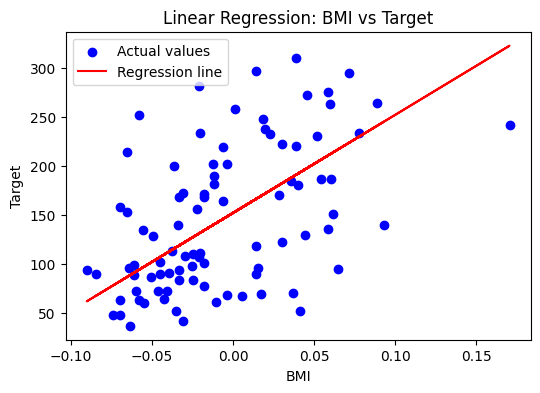

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, color="blue", label="Actual values")
plt.plot(X_test, y_pred, color="red", label="Regression line")
plt.xlabel("BMI")
plt.ylabel("Target")
plt.title("Linear Regression: BMI vs Target")
plt.legend()
plt.show()


In [ ]:


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)


MSE: 4061.8259284949268
R² Score: 0.23335039815872138


In [ ]:
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

y_pred_multi = model_multi.predict(X_test)


In [ ]:
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("Multiple Regression MSE:", mse_multi)
print("Multiple Regression R²:", r2_multi)


Multiple Regression MSE: 4061.8259284949268
Multiple Regression R²: 0.23335039815872138


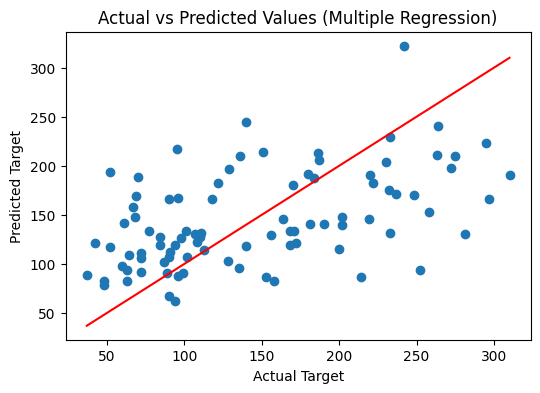

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_multi)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted Values (Multiple Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.show()
